In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
def split_df_by(this_df, include_dtypes:[list]=["int","float"]):
    __author__ = "Roman Kaltschew"
    """takes in this_df, splits it into two NEW DF's by dtype of columns (default ["int","float"]) 
       and returns tuple (incl_df, excl_df)"""
    incl_lst = [_ for _ in this_df.select_dtypes(include=include_dtypes).dtypes.index]
    excl_lst = [_ for _ in this_df.select_dtypes(exclude=include_dtypes).dtypes.index]
    return (this_df[incl_lst], this_df[excl_lst])

In [3]:
def split_column_names_by(this_df, include_dtypes:[list]=["int","float"]):
    __author__ = "Roman Kaltschew"
    """takes in this_df, splits this_df's columns into two lists of column name by dtype of columns (default ["int","float"]) 
       and returns tuple (incl_lst, excl_lst)"""
    incl_lst = [_ for _ in this_df.select_dtypes(include=include_dtypes).dtypes.index]
    excl_lst = [_ for _ in this_df.select_dtypes(exclude=include_dtypes).dtypes.index]
    return (incl_lst, excl_lst)

In [4]:
def plot_x_rated_by_y(this_df, this_x: [str] = None, this_y: [str] = None, x_bins: [int] = 4, y_bins: [int] = 4):
    __author__ = "Roman Kaltschew"
    """creates plot of two columns this_x vs this_y of this_df this_x vs this_y, if either column is numerical, bins
       according x_bins or y_bins will be created. Catches empty df, wrong values for this_x and this_y. x_bins or
       y_bins will be set to 1 if < 1."""
    
    if this_df is None:
        return "DataFrame is empty"

    if x_bins < 1:
        x_bins = 1
    if y_bins < 1:
        y_bins = 1

    if this_x in split_column_names_by(this_df)[0]:    # this_x is numerical
        bin_limits = np.linspace(np.min(this_df[this_x]), np.max(this_df[this_x]), x_bins + 1)
        bin_labels = [f" ≤ {_}" for _ in np.round(bin_limits, 2)[1:len(bin_limits)]]
        groupby_ser = pd.cut(this_df[this_x], bins=bin_limits, labels=bin_labels)
    elif this_x in split_column_names_by(this_df)[1]:  # this_x is categorical
        groupby_ser = this_df[this_x].sort_values()
    else:
        return "check this_x value"

    if this_y in split_column_names_by(this_df)[0]:    # this_y is categorical
        bin_limits = np.linspace(np.min(this_df[this_y]), np.max(this_df[this_y]), y_bins + 1)
        bin_labels = [f" ≤ {_}" for _ in np.round(bin_limits, 2)[1:len(bin_limits)]]
        rateby_ser = pd.cut(this_df[this_y], bins=bin_limits, labels=bin_labels)
    elif this_y in split_column_names_by(this_df)[1]:  # this_y is categorical
        rateby_ser = this_df[this_y].sort_values()
    else:
        return "check this_y value"

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_title(f"{this_x.capitalize().replace('_', ' ')} by {this_y.capitalize().replace('_', ' ')}",
                 size="18", fontweight="bold")  # ↳ reformat column names, 1st letter uppercase and _ replaced by space
    
    sns.countplot(x=groupby_ser, y=None, hue=rateby_ser, palette="YlOrRd")
    plt.legend(loc="upper right")
    plt.show()

In [5]:
raw_df = pd.read_csv("C:/Users/roman/Documents/GitHub/Customer_Data_Analysis/Data/Data_Marketing_Customer_Analysis_Round2.csv")

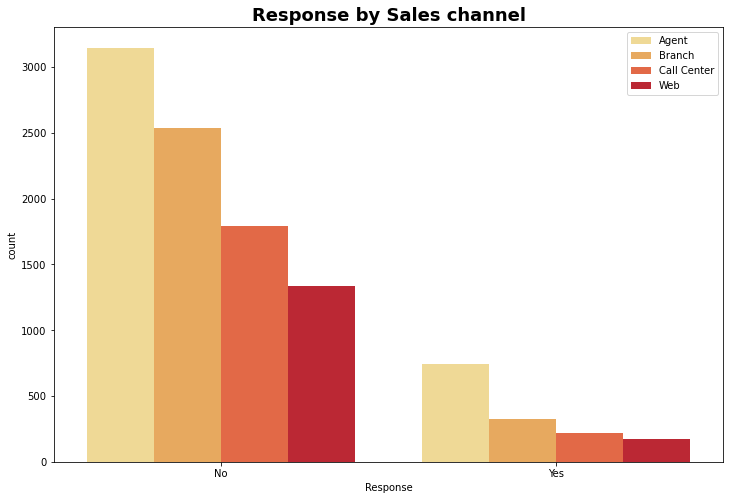

In [6]:
plot_x_rated_by_y(raw_df, "Response", "Sales Channel")       # cat v cat

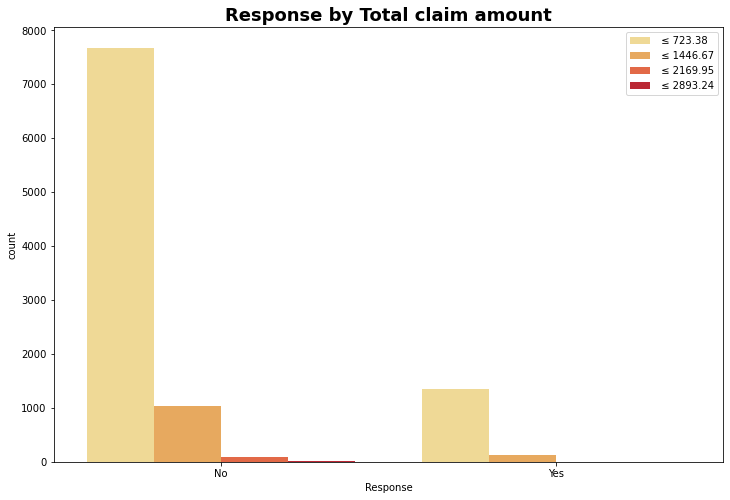

In [7]:
plot_x_rated_by_y(raw_df, "Response", "Total Claim Amount")  # cat vs num

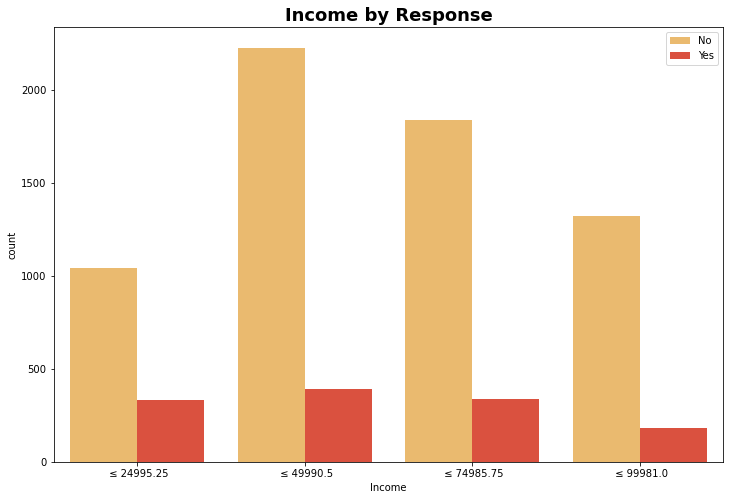

In [8]:
plot_x_rated_by_y(raw_df, "Income", "Response")              # num vs cat

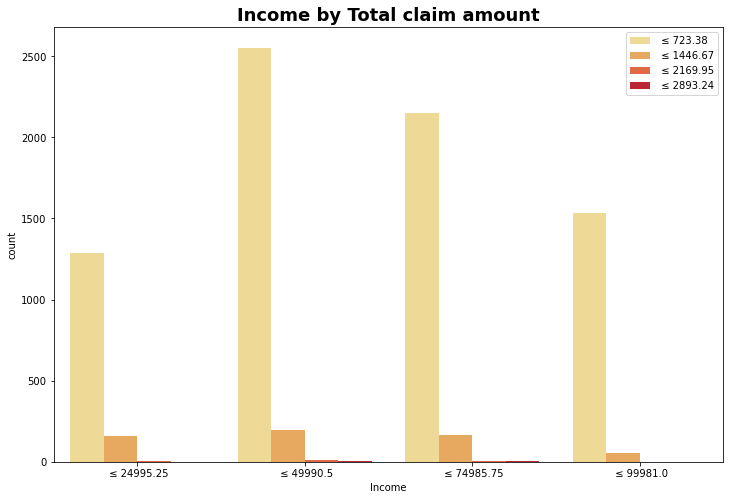

In [9]:
plot_x_rated_by_y(raw_df, "Income", "Total Claim Amount")    # num vs cat